In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = r"F:\Make Money with machine learning\Week4\chest-xray-pneumonia\chest_xray\chest_xray\train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

F:\Make Money with machine learning\Week4\chest-xray-pneumonia\chest_xray\chest_xray\train\NORMAL


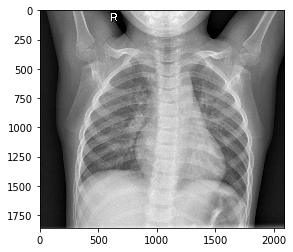

F:\Make Money with machine learning\Week4\chest-xray-pneumonia\chest_xray\chest_xray\train\NORMAL\IM-0115-0001.jpeg


In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        fimg_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(fimg_array, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        print(os.path.join(path,img))
        break
    break

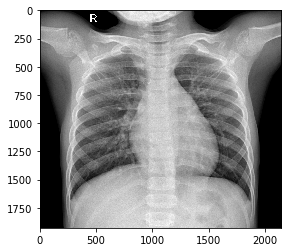

In [4]:
xray_array  = cv2.imread(r'train\NORMAL\IM-0143-0001.jpeg')
xray = cv2.cvtColor(xray_array, cv2.COLOR_BGR2RGB)
plt.imshow(xray)
plt.show()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
image_gen = ImageDataGenerator(rotation_range = 10,
                              width_shift_range = 0.02,
                              height_shift_range = 0.02,
                              rescale = 1/255,
                              shear_range = 0.05,
                              zoom_range = 0.05,
                              horizontal_flip = False,
                              fill_mode = 'nearest')

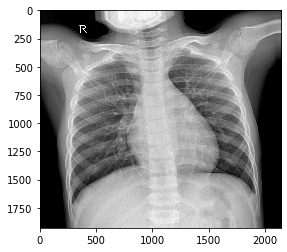

In [7]:
plt.imshow(image_gen.random_transform(xray))

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', 
             optimizer = 'adam',
             metrics = ['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [15]:
batch_size = 16

training_image_gen = image_gen.flow_from_directory('train',
                                                  target_size = (150,150),
                                                  batch_size = batch_size,
                                                  class_mode='binary')

test_image_gen = image_gen.flow_from_directory('test',
                                                  target_size = (150,150),
                                                  batch_size = batch_size,
                                                  class_mode='binary')

validation_image_gen = image_gen.flow_from_directory('val',
                                                  target_size = (150,150),
                                                  batch_size = batch_size,
                                                  class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
training_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
results = model.fit_generator(training_image_gen, epochs = 10,
                             steps_per_epoch = 150,
                             validation_data = test_image_gen,
                             validation_steps = 12)

Epoch 1/10
150/150 [==============================] - 282s 2s/step - loss: 0.4684 - acc: 0.7921 - val_loss: 0.4821 - val_acc: 0.7604
Epoch 2/10
150/150 [==============================] - 241s 2s/step - loss: 0.2495 - acc: 0.9000 - val_loss: 0.6451 - val_acc: 0.7448
Epoch 3/10
150/150 [==============================] - 181s 1s/step - loss: 0.1878 - acc: 0.9192 - val_loss: 0.6312 - val_acc: 0.7552
Epoch 4/10
150/150 [==============================] - 202s 1s/step - loss: 0.1829 - acc: 0.9229 - val_loss: 0.7049 - val_acc: 0.7500
Epoch 5/10
150/150 [==============================] - 205s 1s/step - loss: 0.1853 - acc: 0.9379 - val_loss: 0.8188 - val_acc: 0.7760
Epoch 6/10
150/150 [==============================] - 203s 1s/step - loss: 0.1546 - acc: 0.9371 - val_loss: 0.6760 - val_acc: 0.7917
Epoch 7/10
150/150 [==============================] - 200s 1s/step - loss: 0.1288 - acc: 0.9550 - val_loss: 1.1392 - val_acc: 0.7552
Epoch 8/10
150/150 [==============================] - 206s 1s/step - 

In [18]:
results.history['acc']

[0.7920833333333334,
 0.9,
 0.9191666666666667,
 0.9229166666666667,
 0.9379166666666666,
 0.9370833333333334,
 0.955,
 0.9579166666666666,
 0.94625,
 0.9583333333333334]

In [37]:
from keras.preprocessing import image

normal_image = image.load_img(r'val\NORMAL\NORMAL2-IM-1442-0001.jpeg', target_size = (150,150))
normal_image = image.img_to_array(normal_image)
normal_image = np.expand_dims(normal_image, axis = 0)
normal_image = normal_image/255


In [38]:
model.predict_classes(normal_image)

array([[0]])

In [39]:
pneu_image = image.load_img(r'val\PNEUMONIA\person1951_bacteria_4882.jpeg', target_size = (150,150))
pneu_image = image.img_to_array(pneu_image)
pneu_image = np.expand_dims(pneu_image, axis = 0)
pneu_image = pneu_image/255

In [40]:
model.predict_classes(pneu_image)

array([[1]])

In [30]:
model.predict(pneu_image)

array([[0.997442]], dtype=float32)

In [27]:
model.predict(normal_image)

array([[0.01290726]], dtype=float32)

In [41]:
def predict(model, img, target_size):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
        target_size: (w,h) tuple
    Returns:
        list of predicted labels and their probabilities 
    """
    if img.size != target_size:
        img = img.resize(target_size)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]

In [1]:
from keras.models import load_model
model = load_model('inception.model')

Using TensorFlow backend.
W0918 10:20:42.575180  8228 deprecation_wrapper.py:119] From C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 10:20:42.643163  8228 deprecation_wrapper.py:119] From C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 10:20:42.673126  8228 deprecation_wrapper.py:119] From C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 10:20:42.674146  8228 deprecation_wrapper.py:119] From C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get

In [6]:
from keras.applications.inception_v3 import preprocess_input

In [10]:
from PIL import Image
from keras.preprocessing import image
img = image.load_img('person1946_bacteria_4875.jpeg', target_size = (299,299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

In [11]:
preds

array([[0.7209965 , 0.27900353]], dtype=float32)

In [18]:
def predict(image_path):
    img = image.load_img(image_path, target_size = (299,299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    preds = model.predict(x)
    if preds[0][0]<0.5:
        return(str("PNEUMONIA"))
    else:
        return(str("NORMAL"))

In [19]:
predict('person1946_bacteria_4875.jpeg')

'NORMAL'